### Decision Trees

We'll decision tree model to predict whether mushrooms are poisonous or edible. The dataset includes descriptions of 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as either edible or poisonous.

- Split your data into train and test sets.
- Get basic descriptive statistics for the training data and check for missing and incorrect or extreme values. Get scatterplots or heatmaps showing the relationship between the variables.
- What are the factors that predict whether a mushroom is poisonous?
- Report the accuracy of your model on the training set and on the test set. How successful is the model - what is its precision and recall?
- What is the prevalence of poisonous mushrooms in the dataset? How might prevalence affect the positive and negative predictive values of a test/model?

##### Import Packages

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import numpy as np

###### Examine the data

In [2]:
#reading data
trees = pd.read_csv("data/agaricus-lepiota.data", header = None)
trees.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#renaming columns 
trees.rename(columns = {0:"classes", 1: "cap_shape", 2: "cap_surface", 3: "cap_color", 4: "bruises",
                                5: "odor", 6: "gill_attachment", 7: "gill_spacing", 8: "gill_size",
                                9: "gill_color", 10: "stalk_shape", 11: "stalk_root", 12: "stalk_surface_above_ring",
                                13: "stalk_surface_below_ring", 14: "stalk_color_above_ring",15: "stalk_color_below_ring",
                                16: "veil_type", 17: "veil_color", 18: "ring_number", 19: "ring_type",
                                20: "spore_print_color", 21: "population", 22: "habitat"}, inplace=True)
trees.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#renaming values in each column
trees['classes']= ['poisonous' if each == 'p' else 'edible' for each in trees['classes']]
trees['cap_shape'] = trees['cap_shape'].map({'x': "convex", 'b': "bell", 's': "sunken", 'f': "flat",
                                             'k': "knobbed", 'c': "conical"})
trees['cap_surface'] = trees['cap_surface'].map({'s': "smooth", 'y': "scaly", 'f': "fibrous", 'g': "grooves"})
trees['cap_color'] = trees['cap_color'].map({'n': "brown", 'y': "yellow", 'w': "white", 'g': "gray", 'e': "red",
                                            'p': "pink", 'b': "buff", 'u': "purple", 'c': "cinnamon", 'r': "green"})
trees['bruises']= ['bruises' if each == 't' else 'no' for each in trees['bruises']]
trees['odor'] = trees['odor'].map({'p': "pungent", 'a': "almond", 'l': "anise", 'n': "none", 'f': "foul",
                                  'c': "creosote", 'y': "fishy", 's': "spicy", 'm': "musty"})
trees['gill_attachment'] = trees['gill_attachment'].map({'f': "free", 'a': "attached", 'd': "descending",
                                                         'n': "notched"})
trees['gill_spacing'] = trees['gill_spacing'].map({'c': "close", 'w': "crowded", 'd': "distant"})
trees['gill_size']= ['narrow' if each == 'n' else 'broad' for each in trees['gill_size']]
trees['gill_color'] = trees['gill_color'].map({'k': "black", 'n': "brown", 'g': "gray", 'p': "pink",
                                               'w': "white", 'h': "chocolate", 'u': "purple", 'e': "red",
                                               'b': "buff", 'r': "green", 'y': "yellow", 'o': "orange"})
trees['stalk_shape']= ['enlarging' if each == 'e' else 'tapering' for each in trees['stalk_shape']]
trees['stalk_root'] = trees['stalk_root'].map({'e': "equal", 'c': "club", 'b': "bulbous", 'r': "rooted",
                                               '?': "missing", 'u': "cup", 'z': "rhizomorphs"})
trees['stalk_surface_above_ring'] = trees['stalk_surface_above_ring'].map({'s': "smooth", 'f': "fibrous",
                                                                           'k': "silky", 'y': "scaly"})
trees['stalk_surface_below_ring'] = trees['stalk_surface_below_ring'].map({'s': "smooth", 'f': "fibrous",
                                                                           'y': "scaly", 'k': "silky"})
trees['stalk_color_above_ring'] = trees['stalk_color_above_ring'].map({'w': "white", 'g': "gray", 'p': "pink",
                                                                       'n': "brown", 'b': "buff", 'e': "red", 
                                                                       'o': "orange", 'c': "cinnamon",
                                                                       'y': "yellow"})
trees['stalk_color_below_ring'] = trees['stalk_color_below_ring'].map({'w': "white", 'p': "pink", 'g': "gray",
                                                                       'b': "buff", 'n': "brown", 'e': "red",
                                                                       'y': "yellow", 'o': "orange",
                                                                       'c': "cinnamon"})
trees['veil_type']= ['partial' if each == 'p' else 'universal' for each in trees['veil_type']]
trees['veil_color'] = trees['veil_color'].map({'w': "white", 'n': "brown", 'o': "orange", 'y': "yellow"})
trees['ring_number'] = trees['ring_number'].map({'o': "one", 't': "two", 'n': "none"})
trees['ring_type'] = trees['ring_type'].map({'p': "pendant", 'e': "evanescent", 'l': "large",
                                            'f': "flaring", 'n': "none", 's': "sheathing", 'z': "zone"})
trees['spore_print_color'] = trees['spore_print_color'].map({'k': "black", 'n': "brown", 'u': "purple",
                                                            'h': "chocolate", 'w': "white", 'r': "green",
                                                            'o': "orange", 'y': "yellow", 'b': "buff"})
trees['population'] = trees['population'].map({'s': "scattered", 'n': "numerous", 'a': "abundant", 'v': "several",
                                               'y': "solitary", 'c': "clustered"})
trees['habitat'] = trees['habitat'].map({'u': "urban", 'g': "grasses", 'm': "meadows", 'd': "woods", 'p': "paths",
                                         'w': "waste", 'l': "leaves"})

trees.head(10)

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
5,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
6,edible,bell,smooth,white,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
7,edible,bell,scaly,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
8,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,pink,...,smooth,white,white,partial,white,one,pendant,black,several,grasses
9,edible,bell,smooth,yellow,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,scattered,meadows


In [5]:
trees['classes'].value_counts()

edible       4208
poisonous    3916
Name: classes, dtype: int64

#### Data Preparation

In [6]:
#Dataframe information
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
classes                     8124 non-null object
cap_shape                   8124 non-null object
cap_surface                 8124 non-null object
cap_color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill_attachment             8124 non-null object
gill_spacing                8124 non-null object
gill_size                   8124 non-null object
gill_color                  8124 non-null object
stalk_shape                 8124 non-null object
stalk_root                  8124 non-null object
stalk_surface_above_ring    8124 non-null object
stalk_surface_below_ring    8124 non-null object
stalk_color_above_ring      8124 non-null object
stalk_color_below_ring      8124 non-null object
veil_type                   8124 non-null object
veil_color                  8124 non-null object
ring_number

We can see above only one column has missing data which is the "stalk_root".

In [7]:
print(trees['stalk_root'].value_counts())

bulbous    3776
missing    2480
equal      1120
club        556
rooted      192
Name: stalk_root, dtype: int64


In [8]:
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in trees:
    if trees[col].dtype == 'object':
        trees[col] = le.fit_transform(trees[col])
        
trees.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


In [9]:
trees["classes"].value_counts()

0    4208
1    3916
Name: classes, dtype: int64

To make a base model prediction, we use the mode of the classes. As we can see on the above DataFrame we have 4208 Edible and 3916 Poisonous

##### Split your data into train and test sets.

In [10]:
# Creating the target variable for the test and training sets of data
X = trees.drop('classes', axis = 1)
y = trees.classes

# Split the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

##### Descriptive statistics

In [11]:
X_train.describe()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,...,5686.000000,5686.000000,5686.000000,5686.0,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000
mean,2.494900,1.737074,4.315688,0.577735,4.793880,0.974851,0.162153,0.305135,4.743757,0.567710,...,2.417868,5.439501,5.429828,0.0,1.966233,1.071228,2.301618,3.034822,3.631551,3.213859
std,0.895346,1.184473,3.448894,0.493964,1.993235,0.156593,0.368623,0.460505,3.352460,0.495438,...,0.878067,2.142861,2.168597,0.0,0.240754,0.273790,1.802067,2.831383,1.269014,2.525715
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,2.000000,5.000000,5.000000,0.0,2.000000,1.000000,0.000000,1.000000,3.000000,0.000000
50%,2.000000,2.000000,3.000000,1.000000,6.000000,1.000000,0.000000,0.000000,4.000000,1.000000,...,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,3.000000
75%,3.000000,3.000000,8.000000,1.000000,6.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,6.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


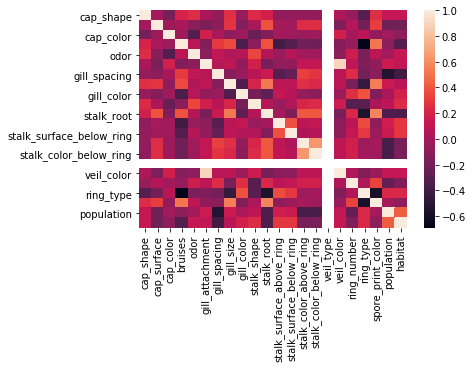

In [12]:
sns.heatmap(X_train.corr())

##### Building decision tree model

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state =50)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

In [14]:
#Predicting
from sklearn.metrics import accuracy_score
predict_model = model.predict(X_test)
prediction = model.predict(X_train)

accuracy_score(y_test,predict_model)

1.0

The model has 100% accuracy. This means that the model is definately overfitting. 

###### Tree Model

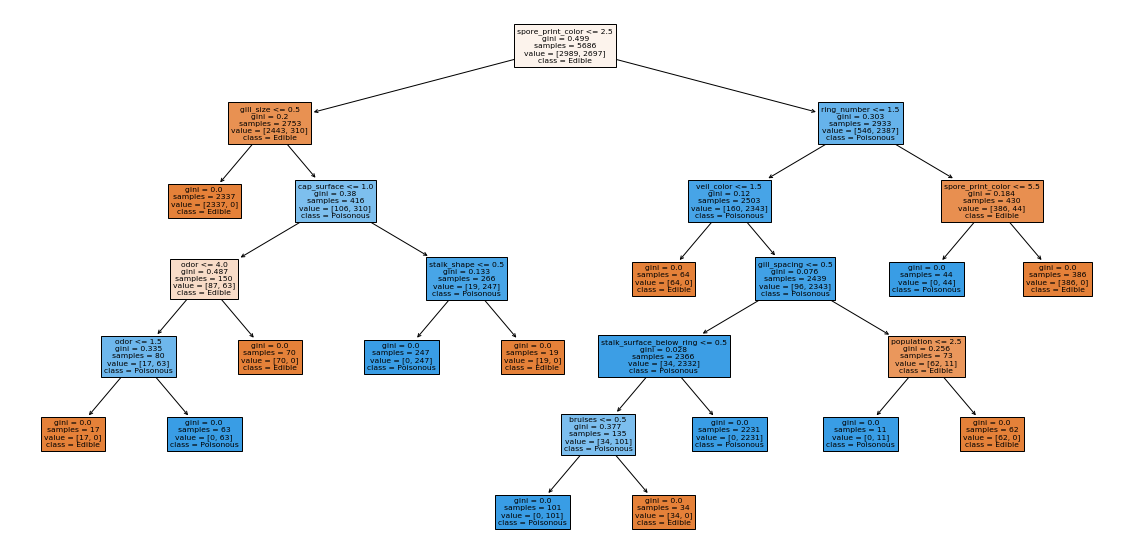

In [57]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[20, 10])
plot_tree(model, feature_names=X.columns, class_names=['Edible', 'Poisonous'], filled=True)
plt.show()

###### Classification report

In [16]:
labels = ['Edible', 'Poisonous']
print('Classification Report')
print(classification_report(y_test, predict_model, target_names=labels))

Classification Report
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1219
   Poisonous       1.00      1.00      1.00      1219

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In this case looking at our scores we see 100% accuracy in our model.

###### Feature importance

In [44]:
feature_list = list(X_train.columns)
importances = list(model.feature_importances_)
feature_importances = list(zip(feature_list, importances))
features_importance = pd.DataFrame(feature_importances,columns = ['features','importance'])
n_features = features_importance[features_importance['importance'] == 0.000]
not_important = features_importance[features_importance['importance'] == 0.000].index

features_importance = features_importance.drop(not_important,axis=0)
features = pd.DataFrame(features_importance)
features.sort_values(by=['importance'], ascending=False)

,features,importance
19,spore_print_color,0.520400
17,ring_number,0.179924
7,gill_size,0.138319
16,veil_color,0.040593
6,gill_spacing,0.034821
4,odor,0.025773
3,bruises,0.017942
1,cap_surface,0.017498
9,stalk_shape,0.012444
20,population,0.006590


### Conclusion

The model has an accurate score of 100 %, given the dataset it was able to make prefect predictions. This of course might be due to over-fitting which I personally doubt that would be the cause. 